<a href="https://colab.research.google.com/github/ayushbisht2001/MACHINE-LEARNING-WITH-TF/blob/main/Linear_Regression_Model_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [194]:
tf.compat.v1.disable_eager_execution()
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))
noise

array([ 0.84685295, -0.48265851, -1.30771946, ..., -0.47679332,
        2.62339029,  1.76588725])

In [195]:
y_true = (1*x_data) + 5 + noise

In [196]:
x_df = pd.DataFrame(data = x_data,columns = ['X-Data'])

In [197]:
y_df = pd.DataFrame(data =y_true,columns=['Y'])

In [198]:
y_df.head()


,Y
0,5.846853
1,4.517351
2,3.692301
3,4.278523
4,2.758584


In [199]:
my_data = pd.concat([x_df,y_df],axis=1)

In [200]:
my_data.head()

,X-Data,Y
0,0.00000,5.846853
1,0.00001,4.517351
2,0.00002,3.692301
3,0.00003,4.278523
4,0.00004,2.758584


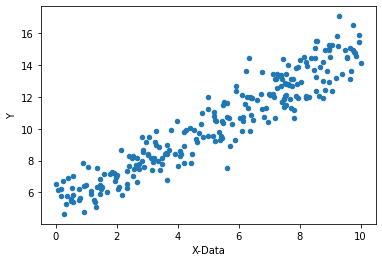

In [201]:
my_data.sample(n=250).plot(kind='scatter',x="X-Data",y="Y")

In [202]:
batch_size = 8

* In short, you use tf.Variable for trainable variables such as weights (W) *and biases (B) for your model.

* tf.placeholder is used to feed actual training examples.

In [203]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [204]:
xph = tf.compat.v1.placeholder(tf.float32,[batch_size])
yph = tf.compat.v1.placeholder(tf.float32 , [batch_size])

xph

<tf.Tensor 'Placeholder_14:0' shape=(8,) dtype=float32>

In [205]:
y_model = m*xph + b

* tk.reduce_sum() :  https://stackoverflow.com/questions/47157692/how-does-reduce-sum-work-in-tensorflow

In [206]:
error =  tf.reduce_sum(tf.square(yph-y_model))


In [207]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [208]:
init = tf.compat.v1.global_variables_initializer()


* numpy.random.randint(low, high=None, size=None, dtype=int)
  * Return random integers from low (inclusive) to high (exclusive).

  * Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).
  

In [209]:
with tf.compat.v1.Session() as sess:
  sess.run(init)
  epochs = 100
  for i in range(epochs):
    rand_ind = np.random.randint(low=len(x_data),size = batch_size)    
    feed = {xph : x_data[rand_ind],yph : y_true[rand_ind]}
    sess.run(train,feed_dict = feed)
  model_m,model_b = sess.run([m,b])

In [210]:
y_hat = x_data*model_m + model_b

In [211]:
model_b

2.382064

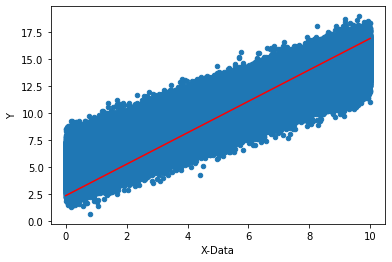

In [212]:
my_data.sample(n=1000000).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(x_data,y_hat,'r')

Till now, We have manually created our machine learning model . 

Now the same thing can be done using APIs, which is implemented below....

In [213]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]
print(feat_cols)



 

[NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzifk4h6x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_

## tf.estimator.LinearRegressor(feature_columns=feat_cols)

* It basically do all the stuff by themselve, such that, taking some value for m and b and then apply function with Gradient optimizer. Basically we are providing the x and y value, and it perform linear regression for these given values to get the predicted value for y.

In [ ]:
# estimator is basically use to call the different form of model.
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

In [214]:
from sklearn.model_selection import train_test_split

# train_test_split is used to split the data into training and test set with 30% of the total data in test set and remainning are in training set
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


x_train , x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size =0.3,random_state=0)


input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle = True)
print(input_func)
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=100,shuffle = False)

eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=100,shuffle = False)

<function numpy_input_fn.<locals>.input_fn at 0x7fd2a5635620>


In [215]:
estimator.train(input_fn = input_func,steps = 1000)




INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpzifk4h6x/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 109.86784, step = 0
INFO:tensorflow:global_step/sec: 752.006
INFO:tensorflow:loss = 5.6724787, step = 100 (0.135 sec)
INFO:tensorflow:global_step/sec: 762.914
INFO:tensorflow:loss = 1.2566943, step = 201 (0.132 sec)
INFO:tensorflow:global_step/sec: 783.541
INFO:tensorflow:loss = 2.3904824, step = 300 (0.128 sec)
INFO:tensorflow:global_step/sec: 808.849
INFO:tensorflow:loss = 0.9993079, step = 400 (0.125 sec)
INFO:tensorflow:global_step/sec: 796.845
INFO:tensorflow:loss = 2.5215938, step = 500 (0.132 sec)
INFO:tensorflow:global_step/sec: 682.618
INFO:tensorflow:loss = 0.84576976, step = 600 (0.137 sec)
INFO:tensorflow:global_s

## Getting performance metrics , such that: average_loss, mean, etc etc...
* They are just to check the performance of model.If evaluation is not done,our model still give the same output.

In [216]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps = 1000)

eval_metrics = estimator.evaluate(input_fn=eval_input_func ,steps = 1000)                                                                                                                                          

input_fu_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle = False)

In [217]:
Predictions = [x['predictions'] for x in estimator.predict(input_fn=input_fu_predict)]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzifk4h6x/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [218]:
Predictions

[array([4.0794535], dtype=float32),
 array([5.3695397], dtype=float32),
 array([6.659626], dtype=float32),
 array([7.9497128], dtype=float32),
 array([9.2397995], dtype=float32),
 array([10.529885], dtype=float32),
 array([11.819971], dtype=float32),
 array([13.110058], dtype=float32),
 array([14.400145], dtype=float32),
 array([15.69023], dtype=float32)]

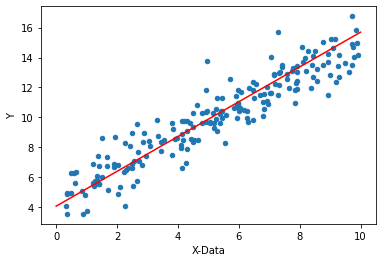

In [219]:
my_data.sample(n=200).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(np.linspace(0,10,10),Predictions,'r')